<a href="https://colab.research.google.com/github/NancyBudgujjar/Liver-Disease-Prediction/blob/main/Final_GEC_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/uciml/indian-liver-patient-records

Prediction of Liver Disease using Random Forest classifierand balancing imbalanced data

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. 
The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). 
This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Based on chemical compounds(bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT , SGPT the outcome mentioned whether 
person is patient ie needs to be diagnosed or not.

Columns:

*   Age of the patient
*   Gender of the patient

*   Total Bilirubin

*   Direct Bilirubin

*   Alkaline Phosphotase

*   Alamine Aminotransferase
*   Aspartate Aminotransferase


*   Total Protiens

*   Albumin


*   Albumin and Globulin Ratio


*   Dataset: field used to split the data into two sets (patient with liver disease, or no disease) 




In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/indian_liver_patient.csv')
df.shape

(583, 11)

In [4]:
df['Dataset'].value_counts()  # 1 = Liver disease and 2 is no disease

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
categories = {1: 1, 2: 0}   #Now we map 1 = 1(Liver disease), 2 = 0(no disease)
df['Dataset'] = df['Dataset'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.describe().T  #Values need to be normalized before fitting. 

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,0.713551,0.452490,0.0,0.0,1.00,1.0,1.0


In [8]:
print(df.isnull().sum())
#df = df.dropna()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [9]:
print(df['Albumin_and_Globulin_Ratio'].mean())

0.9470639032815197


In [10]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [11]:
df.duplicated().sum()

13

In [12]:
df.drop_duplicates()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [13]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'Dataset':'Label'})
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

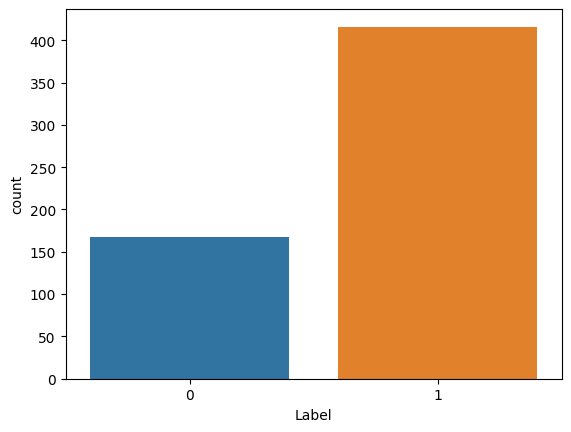

In [14]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

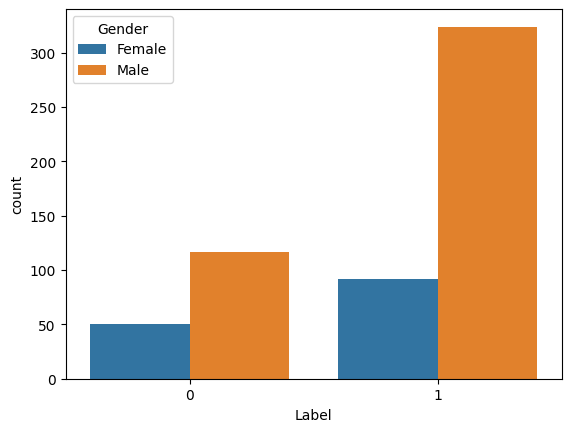

In [15]:
sns.countplot(x="Label", hue="Gender", data=df)

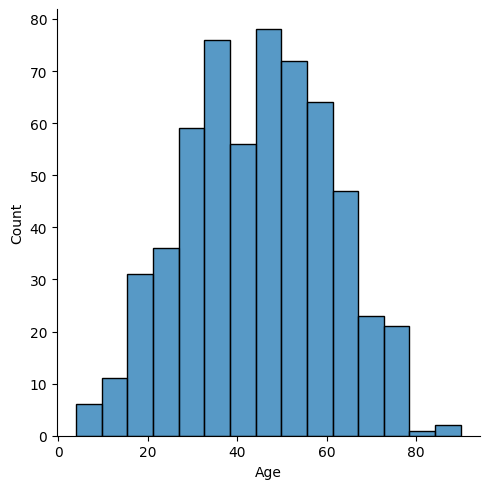

In [16]:
sns.displot(df['Age'], kde=False)

<Axes: xlabel='Age', ylabel='count'>

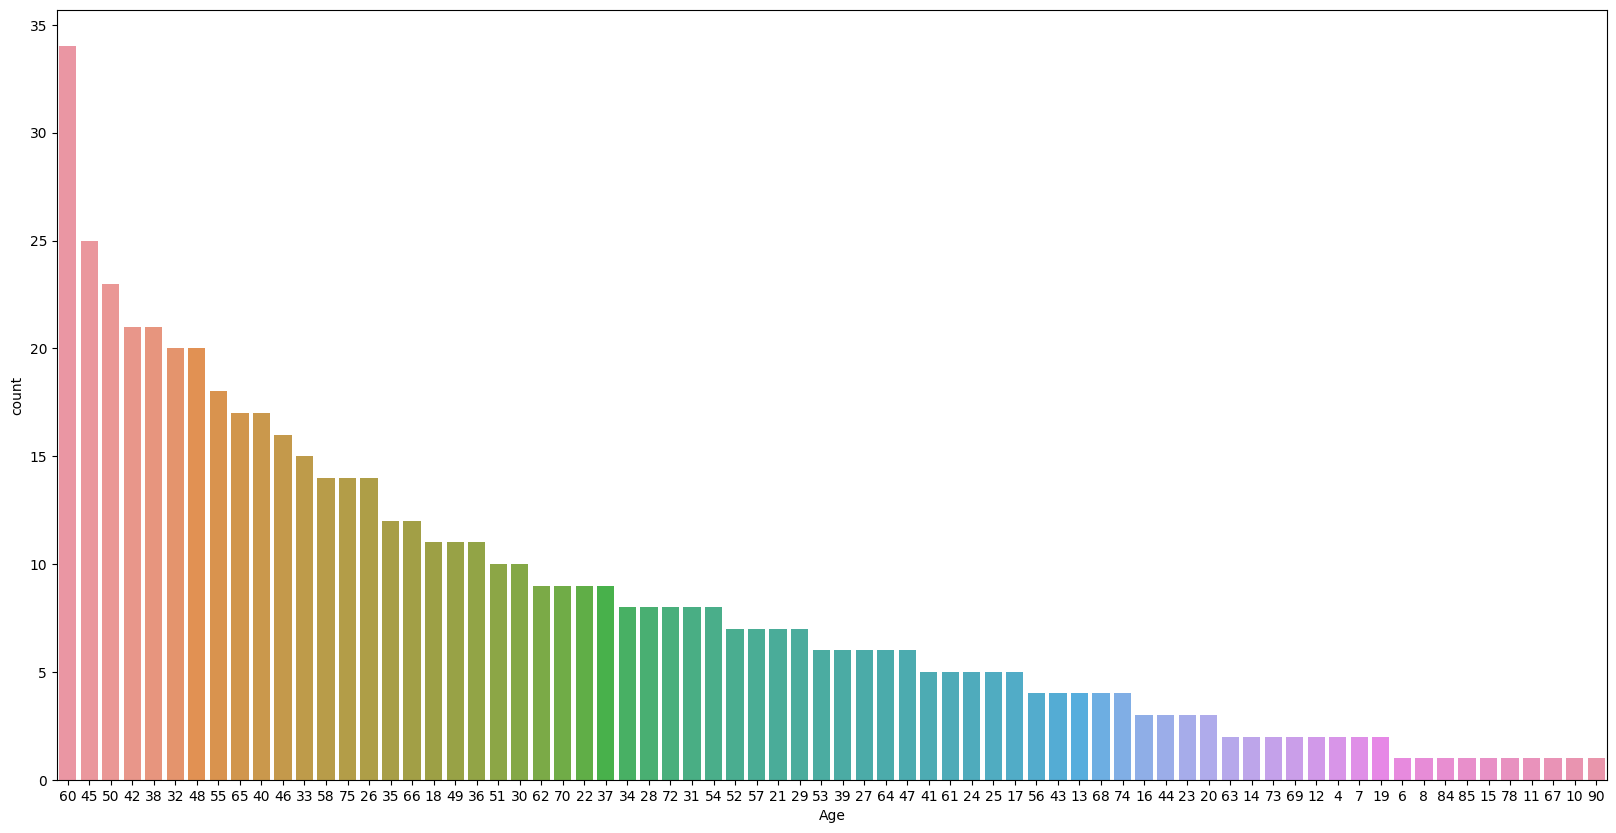

In [17]:
plt.figure(figsize=(20,10)) 
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='Albumin'>

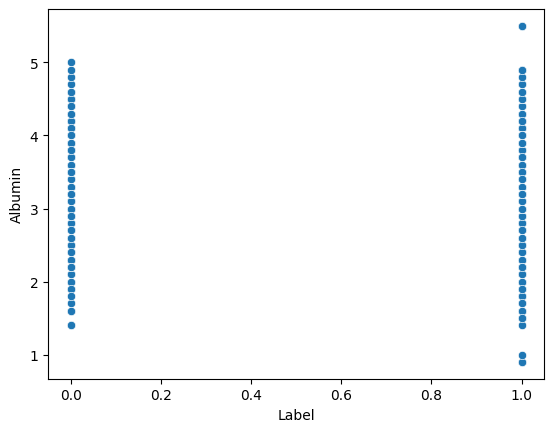

In [18]:
sns.scatterplot(x="Label", y="Albumin", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Label', ylabel='Albumin_and_Globulin_Ratio'>

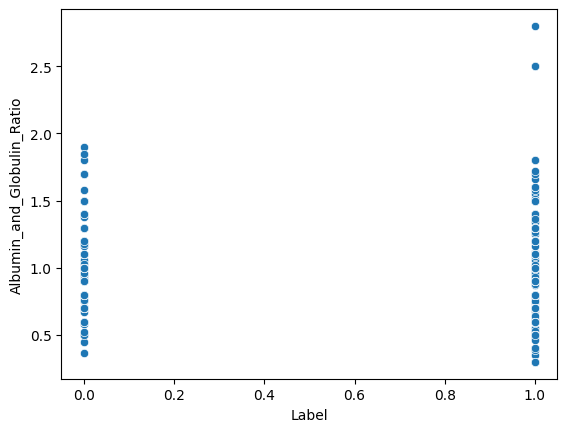

In [19]:
sns.scatterplot(x="Label", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

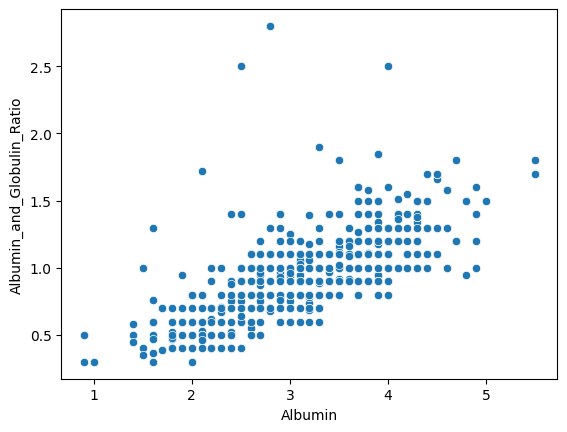

In [20]:
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

In [21]:
#sns.pairplot(df, hue='Gender')

<ipython-input-22-5d808ea4b7c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

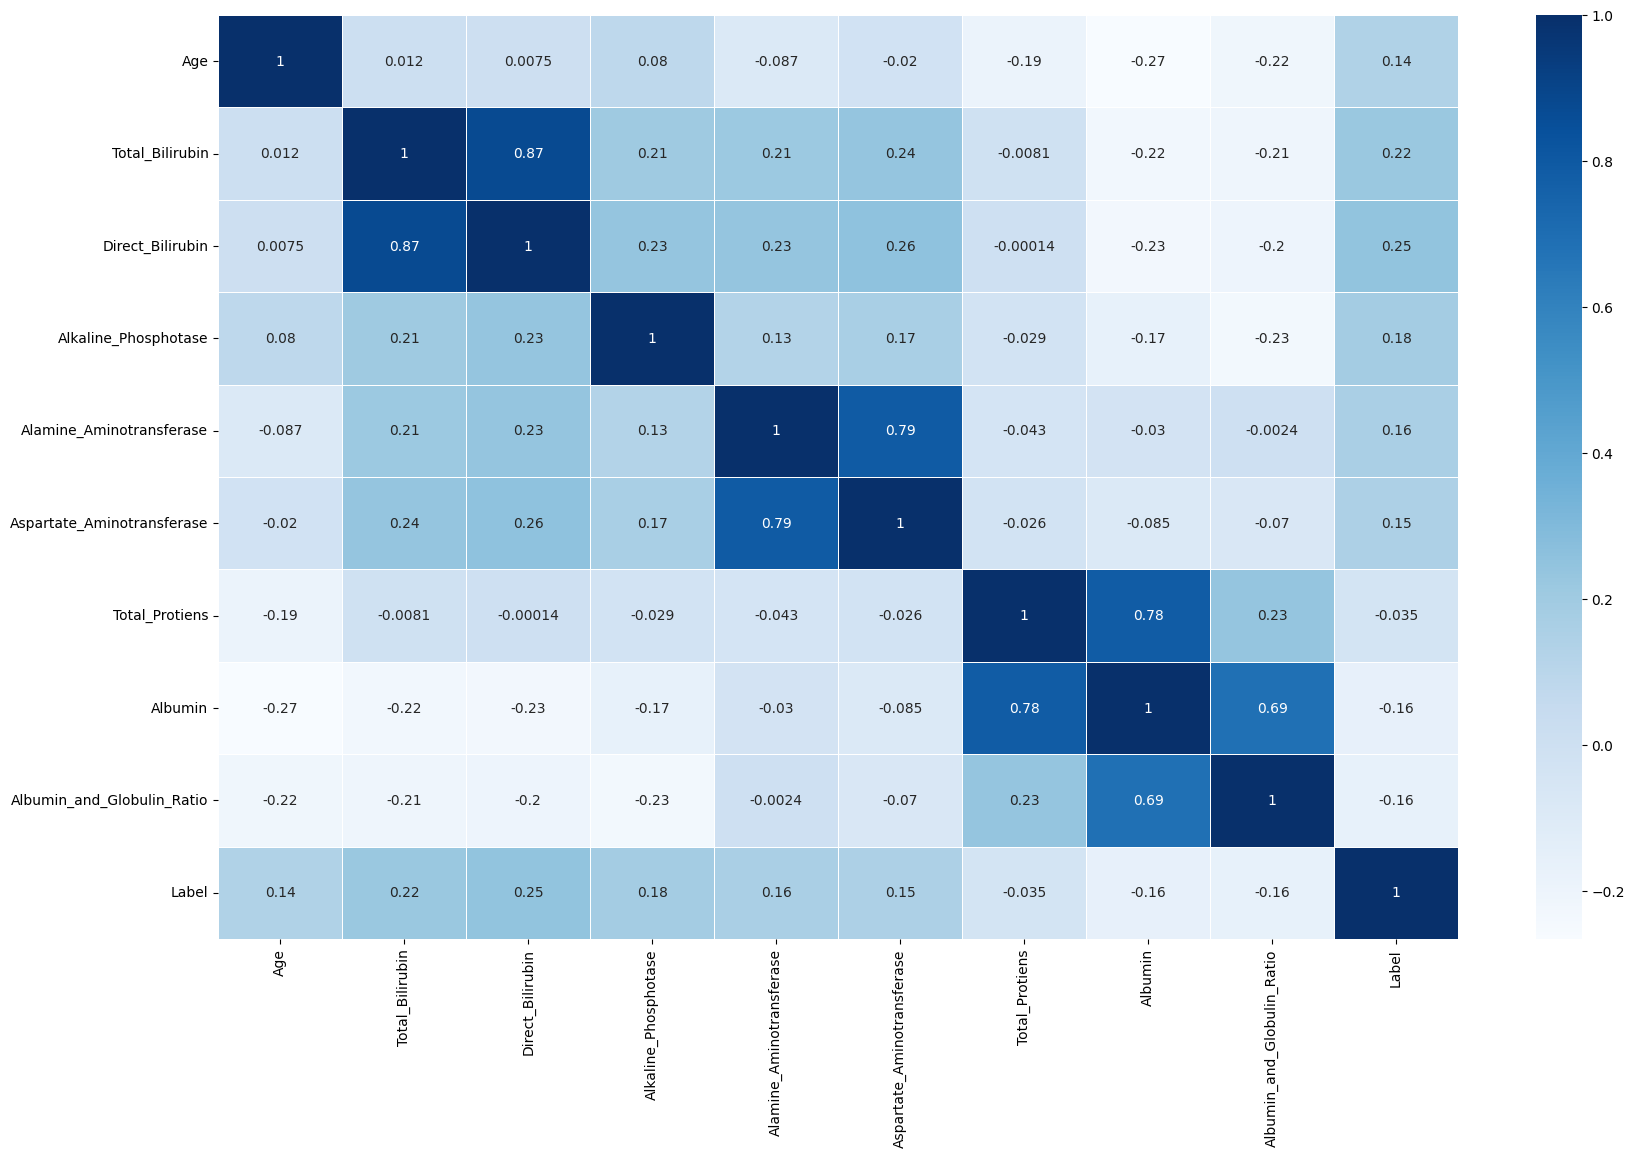

In [22]:
corr=df.corr()
plt.figure(figsize=(20,12)) 
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True)
#May be Gender and total protien not big factors influencing the label

In [23]:
df['Gender'].value_counts()  

Male      441
Female    142
Name: Gender, dtype: int64

In [24]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Gender'] = df['Gender'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Label", "Gender"], axis=1) 

In [26]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(466, 9)
(466,)


In [27]:
from keras.utils import normalize
X = normalize(X, axis=1)

#Logestic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=900)

logreg.fit(X_train, y_train) # fit the model on the training data

y_pred = logreg.predict(X_test) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test, y_pred) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7521367521367521


#Linear Regression model

In [30]:
from sklearn.linear_model import LinearRegression
# create a Linear Regression model and fit it to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test) # use the model to make predictions on the test set

mae = metrics.mean_absolute_error(y_test, y_pred) # calculate mean absolute error and accuracy
accuracy = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Accuracy: {accuracy}")

Mean Absolute Error: 0.370677865944208
Accuracy: 0.11439149174891061


#Support Vector MAchine (SVM)

In [31]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7435897435897436


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

models= [('Logistic Regression', LogisticRegression()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('RandomForestClassifier',RandomForestClassifier()),
         ('AdaBoostClassifier',AdaBoostClassifier()),
         ('XGBClassifier',XGBClassifier()),
         ('KNeighborsClassifier',KNeighborsClassifier()),
         ('GaussianNB',GaussianNB ())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                ModelName  Train_Acc  Test_Acc
0     Logistic Regression   0.706009  0.769231
1           Decision Tree   1.000000  0.726496
2  RandomForestClassifier   1.000000  0.735043
3      AdaBoostClassifier   0.806867  0.700855
4           XGBClassifier   1.000000  0.735043
5    KNeighborsClassifier   0.778970  0.683761
6              GaussianNB   0.551502  0.521368


# Technique 1: Appropriate Model Selection
Logistic regression :- Can be very slow. 

SVM :- can also be extremely slow. 

Random Forest :- ideal for imbalanced datasets. 

#Random Forest

In [39]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

RandomForestClassifier(n_estimators=25, random_state=42)

In [40]:
#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Alkaline_Phosphotase          0.149324
Alamine_Aminotransferase      0.139572
Aspartate_Aminotransferase    0.132227
Age                           0.122021
Total_Bilirubin               0.099369
Total_Protiens                0.092978
Direct_Bilirubin              0.091836
Albumin                       0.089666
Albumin_and_Globulin_Ratio    0.083007
dtype: float64


In [41]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data. 

print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test_RF))

METRICS FOR IMBALANCED DATA: 
Accuracy =  0.7777777777777778


In [42]:
(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print(unique, counts)

[0 1] [24 93]


In [43]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print(cm)

[[14 16]
 [10 77]]


In [44]:
#Print individual accuracy values for each class, based on the confusion matrix
print("With Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("No disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With Lung disease =  0.5833333333333334
No disease =  0.8279569892473119


Note the low accuracy for the important class (201 label)

Right metric is ROC AUC

Starting version 0.23.1 you can report this for multilabel problems. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [45]:
from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

print("ROC_AUC score for imbalanced data is:")
print(roc_auc_score(y_test, prediction_test_RF))

ROC_AUC score for imbalanced data is:
0.6758620689655173


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


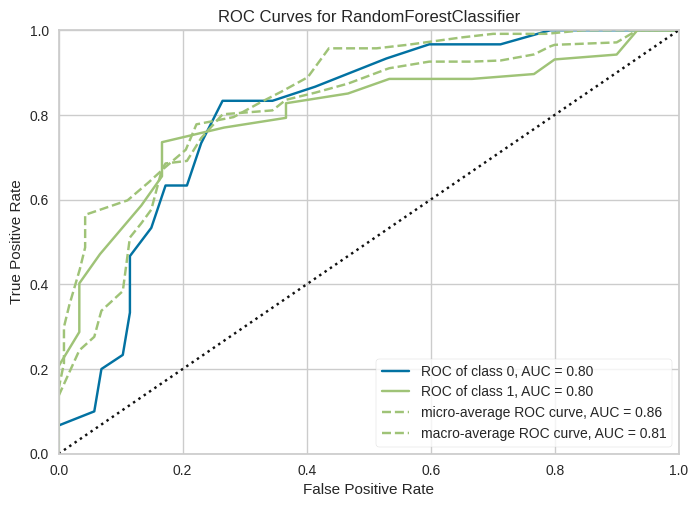

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [46]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

*   Handling Imbalanced data
*   Technique 2 Up-sample minority class

In [47]:
from sklearn.utils import resample
print(df['Label'].value_counts())

1    416
0    167
Name: Label, dtype: int64


In [52]:
#Separate majority and minority classes
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

In [53]:
# Upsample minority class and other classes separately
# If not, random samples from combined classes will be duplicated and we run into same issue as before, undersampled remians undersampled.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match average class
                                 random_state=42) # reproducible results

In [54]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['Label'].value_counts())

1    416
0    416
Name: Label, dtype: int64


In [55]:
Y_upsampled = df_upsampled["Label"].values

#Define the independent variables
X_upsampled = df_upsampled.drop(labels = ["Label", "Gender"], axis=1) 
X_upsampled = normalize(X_upsampled, axis=1)

In [56]:
#Split data into train and test to verify accuracy after fitting the model. 
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

In [57]:
#Train again with new upsamples data
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)

In [58]:
# Train the model on training data
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
prediction_test_RF_upsampled = model_RF_upsampled.predict(X_test_upsampled)

In [59]:
print("METRICS FOR BALANCED DATA USING UPSAMPLING : ")
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, prediction_test_RF_upsampled))

METRICS FOR BALANCED DATA USING UPSAMPLING : 
Accuracy =  0.8622754491017964


In [60]:
cm_upsampled = confusion_matrix(y_test_upsampled, prediction_test_RF_upsampled)
print(cm_upsampled)

[[71  6]
 [17 73]]


In [61]:
print("With Lung disease =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0]))
print("No lung disease = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1]))

With Lung disease =  =  0.8068181818181818
No lung disease =  0.9240506329113924


In [62]:
print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, prediction_test_RF_upsampled))

ROC_AUC score for balanced data using upsampling is:
0.8665945165945166


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


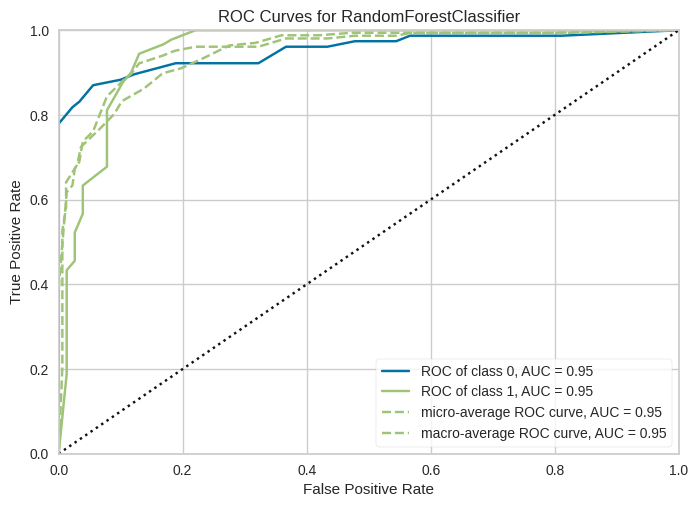

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF_upsampled)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

# Technique 6: Generate synthetic data (SMOTE and ADASYN)
SMOTE: Synthetic Minority Oversampling Technique

ADASYN: Adaptive Synthetic

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

pip install imblearn

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [64]:
from imblearn.over_sampling import SMOTE, ADASYN

X_smote, Y_smote = SMOTE().fit_resample(X, Y)  #Beware, this takes some time based on the dataset size
X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

In [65]:
(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

Original data:  [0 1] [167 416]


In [66]:
(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)
(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

After SMOTE:  [0 1] [416 416]
After ADASYN:  [0 1] [388 416]


In [67]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)
prediction_test_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, prediction_test_smote))

Accuracy =  0.7485029940119761


In [68]:
print(roc_auc_score(y_test_smote, prediction_test_smote))

0.7372463768115942


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


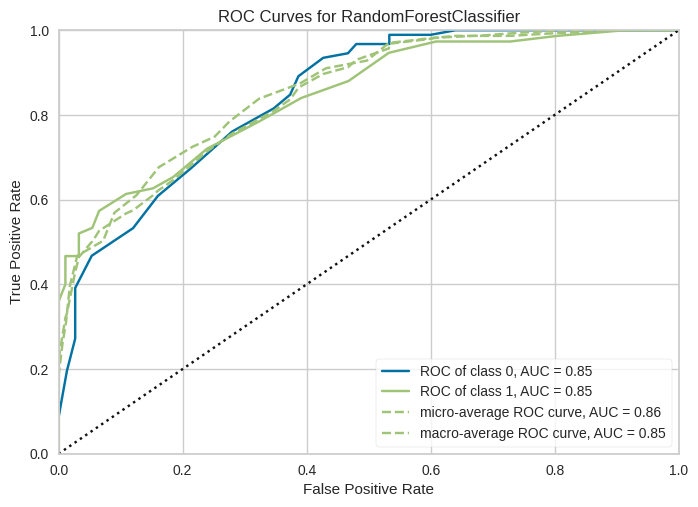

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [69]:
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()